In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Traindf=pd.read_excel('Final_Train.xlsx')

In [3]:
Traindf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
Traindf.shape

(5961, 7)

In [5]:
Traindf.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [6]:
Testdf=pd.read_excel('Final_Test.xlsx')

In [7]:
Testdf.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [8]:
Testdf.shape

(1987, 6)

In [9]:
Testdf.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [10]:
Traindf['Data']='Train'
Testdf['Data']='Test'
Testdf['Fees']=0

In [11]:
df=pd.concat([Traindf,Testdf])
df.head()

,Data,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,Train,24 years experience,100,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,Train,12 years experience,350,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,Train,9 years experience,300,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,Train,12 years experience,250,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,Train,20 years experience,250,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
Data                  7948 non-null object
Experience            7948 non-null object
Fees                  7948 non-null int64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: int64(1), object(7)
memory usage: 558.8+ KB


In [13]:
df.isnull().sum()

Data                     0
Experience               0
Fees                     0
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

**Experience Column**

In [14]:
df['Experience']=df['Experience'].str.split(' ').str[0]

In [15]:
df['Experience']=df['Experience'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
Data                  7948 non-null object
Experience            7948 non-null int32
Fees                  7948 non-null int64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: int32(1), int64(1), object(6)
memory usage: 527.8+ KB


**Place Column**

In [17]:
df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [18]:
df.isnull().sum()

Data                     0
Experience               0
Fees                     0
Miscellaneous_Info    3454
Place                    0
Profile                  0
Qualification            0
Rating                4392
City                     0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])
df['Place']=le.fit_transform(df['Place'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 9 columns):
Data                  7948 non-null object
Experience            7948 non-null int32
Fees                  7948 non-null int64
Miscellaneous_Info    4494 non-null object
Place                 7948 non-null int32
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
City                  7948 non-null int32
dtypes: int32(3), int64(1), object(5)
memory usage: 527.8+ KB


**Profile Column**

In [21]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [22]:
df['Profile']=le.fit_transform(df['Profile'])

**Rating Column**

In [23]:
df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%', '52%'],
      dtype=object)

In [24]:
df['Rating']=df['Rating'].str.split('%').str[0]

In [25]:
df['Rating'].fillna('0',inplace=True)

In [26]:
df['Rating']=df['Rating'].astype(int)

**Qualification Column**

In [27]:
df['Qualification'].nunique()

1801

In [28]:
df['Qualification'].value_counts()

BDS                                                                                                                                                                                                                                                                                    632
BHMS                                                                                                                                                                                                                                                                                   627
BAMS                                                                                                                                                                                                                                                                                   624
MBBS                                                                                                                                                   

In [29]:
df['Qual_1']=df['Qualification'].str.split(',').str[0]

In [30]:
def rep(x):
    if x=='0':
        x=0
    else:
        x=1
        return x

In [31]:
df['Qual_1']= df['Qual_1'].apply(lambda x:rep(x))

In [32]:
df['Qual_2']=df['Qualification'].str.split(',').str[1]

In [33]:
df['Qual_2'].fillna('0',inplace=True)

In [34]:
df['Qual_2']= df['Qual_2'].apply(lambda x:rep(x))

In [35]:
df['Qual_2'].isnull().sum()

2571

In [36]:
df['Qual_2'].fillna(0,inplace=True)

In [37]:
df['Qual_2'].unique()

array([1., 0.])

In [38]:
df['Qual_2']=df['Qual_2'].astype(int)

In [39]:
df['Qual_3']=df['Qualification'].str.split(',').str[2]

In [40]:
df['Qual_3'].fillna('0',inplace=True)

In [41]:
df['Qual_3']= df['Qual_3'].apply(lambda x:rep(x))

In [42]:
df['Qual_3'].isnull().sum()

6088

In [43]:
df['Qual_3'].fillna(0,inplace=True)

In [44]:
df['Qual_3'].unique()

array([0., 1.])

In [45]:
df['Qual_3']=df['Qual_3'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 12 columns):
Data                  7948 non-null object
Experience            7948 non-null int32
Fees                  7948 non-null int64
Miscellaneous_Info    4494 non-null object
Place                 7948 non-null int32
Profile               7948 non-null int32
Qualification         7948 non-null object
Rating                7948 non-null int32
City                  7948 non-null int32
Qual_1                7948 non-null int64
Qual_2                7948 non-null int32
Qual_3                7948 non-null int32
dtypes: int32(7), int64(2), object(3)
memory usage: 589.9+ KB


In [47]:
df.drop(['Qualification'],axis=1,inplace=True)

**Miscellaneous_Info Column**

In [48]:
df['Miscellaneous_Info'].nunique()

3980

In [49]:
df['Miscellaneous_Info'].fillna('Missing',inplace=True)

In [50]:
df['Miscellaneous_Info'].value_counts()

Missing                                                                                                                                          3454
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                                                                                 50
Skin Allergy Treatment Skin Allergies Dermabrasion                                                                                                 18
Tooth Extraction Dental Fillings Scaling / Polishing                                                                                               16
Dental Fillings Zirconia Crowns Dental Implant Fixing                                                                                              15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment                                                                                            14
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment                

In [51]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [52]:
df.head()

,Data,Experience,Fees,Place,Profile,Rating,City,Qual_1,Qual_2,Qual_3
0,Train,24,100,324,5,100,4,1,1,0
1,Train,12,350,926,0,98,0,1,1,0
2,Train,9,300,494,3,0,0,1,1,0
3,Train,12,250,74,0,0,0,1,1,0
4,Train,20,250,367,0,100,1,1,0,0


In [53]:
df['Total_qual']=df.iloc[:,-3:].sum(axis=1)

In [54]:
df.drop(df.columns[[6,7,8]], axis = 1, inplace = True)

In [55]:
df.head()

,Data,Experience,Fees,Place,Profile,Rating,Qual_3,Total_qual
0,Train,24,100,324,5,100,0,2
1,Train,12,350,926,0,98,0,2
2,Train,9,300,494,3,0,0,2
3,Train,12,250,74,0,0,0,2
4,Train,20,250,367,0,100,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 8 columns):
Data          7948 non-null object
Experience    7948 non-null int32
Fees          7948 non-null int64
Place         7948 non-null int32
Profile       7948 non-null int32
Rating        7948 non-null int32
Qual_3        7948 non-null int32
Total_qual    7948 non-null int64
dtypes: int32(5), int64(2), object(1)
memory usage: 403.6+ KB


In [57]:
Trainfinal=df.loc[df['Data']=='Train']
Testfinal=df.loc[df['Data']=='Test']

In [58]:
Trainfinal.drop(['Data'],axis=1,inplace=True)
Testfinal.drop(['Data'],axis=1,inplace=True)

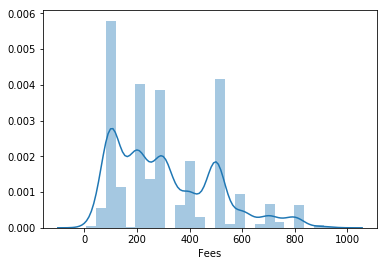

In [59]:
sns.distplot(Trainfinal['Fees'])

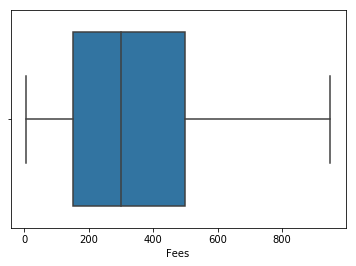

In [60]:
sns.boxplot(Trainfinal['Fees'])

In [61]:
x=Trainfinal.drop(['Fees'],axis=1)
x.head()

,Experience,Place,Profile,Rating,Qual_3,Total_qual
0,24,324,5,100,0,2
1,12,926,0,98,0,2
2,9,494,3,0,0,2
3,12,74,0,0,0,2
4,20,367,0,100,0,1


In [62]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [63]:
y=Trainfinal['Fees']
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split,cross_val_score

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [66]:
print(x_train.shape,x_test.shape)

(4172, 6) (1789, 6)


In [67]:
print(y_train.shape,y_test.shape)

(4172,) (1789,)


In [68]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [69]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
SV=SVR()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)

In [70]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('SVR',SV))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [71]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
rmse=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    b=np.sqrt(mse)
    print('RMSE= ',b)
    rmse.append(b)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R2_score =  0.08543339154104235
Mean_Squared_Error = 33309.24635124849
RMSE=  182.50820899687906
Cross_Val_Score =  0.10552463820191213


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.08545826708519622
Mean_Squared_Error = 33308.34036406212
RMSE=  182.50572693497077
Cross_Val_Score =  0.10511378831385956


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.0854322331013444
Mean_Squared_Error = 33309.28854254754
RMSE=

In [72]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'RMSE' : rmse ,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,RMSE,Cross_val_score
0,LinearRegression,0.085433,33309.246,182.508209,0.105525
1,Lasso,0.085458,33308.340,182.505727,0.105114
2,Ridge,0.085432,33309.289,182.508325,0.105525
3,ElasticNet,0.073964,33726.982,183.649074,0.088499
4,DecisionTreeRegressor,-0.573685,57314.869,239.405239,-0.583667
5,SVR,0.050370,34586.268,185.973838,0.075762
6,KNeighborsRegressor,0.026075,35471.115,188.337769,0.020455
7,AdaBoostRegressor,0.108316,32475.847,180.210563,0.115052
8,RandomForestRegressor,0.004145,36269.847,190.446441,0.060936
9,GradientBoostingRegressor,0.181087,29825.457,172.700483,0.194822


**I choose GradientBoostingRegressor as my final model because it has very less Root_Mean_Squared_Error**

RMSE = 172.700483